# Random forest
## Classifying Mushrooms using Randomforest
### Ref: https://www.kaggle.com/madhukaraphatak/random-forest-classifier-with-0-99-accuracy

In [16]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [17]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [18]:
#Set all columns as categorical. One hot encode them
for col in df.columns :
   df[col] = pd.get_dummies(df[col])


In [19]:
#One hot encoded data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [20]:
#X and Y
X = df.loc[:,df.columns !='class']
y = df.loc[:,df.columns == 'class']

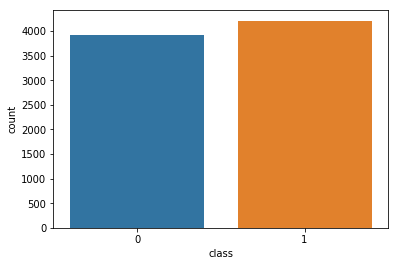

In [21]:
import seaborn as sns
sns.countplot(x='class',data=df)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()

In [24]:
rclf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [25]:
from sklearn.metrics import accuracy_score,recall_score
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
y_pred = rclf.predict(X_test)
print(len(X_test))
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))


2438
Accuracy: 0.9917965545529123
Recall: 0.9960691823899371


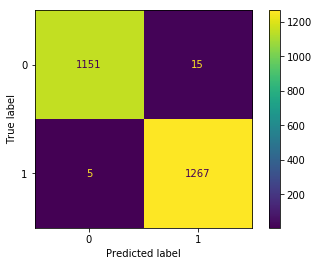

In [26]:
plot_confusion_matrix(rclf, X_test, y_test)  